In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import zipfile
from shapely.geometry import Point, LineString

In [7]:
from dotenv import load_dotenv

# Load the .env file
load_dotenv()

# Access the API key
my_api_key = os.getenv('API_KEY')


In [8]:
### GATHERING DATASETS ###

def fetch_data(url, headers):
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching data from {url}: {response.status_code}")
        return None

def save_to_csv(data, filename):
    # Construct the full file path
    full_path = os.path.join("data", filename)

    df = pd.DataFrame(data)
    df.to_csv(full_path, index=False)
    print(f"Data saved to {filename}")

def get_bus_routes(api_key):
    headers = {
        "AccountKey": api_key,
        "accept": "application/json"
    }
    
    bus_routes_url = "https://datamall2.mytransport.sg/ltaodataservice/BusRoutes"
    all_bus_routes = []
    skip = 0
    limit = 500  # Limit per API call

    while True:
        # Construct the URL with pagination
        paginated_url = f"{bus_routes_url}?$skip={skip}&$top={limit}"
        bus_routes_data = fetch_data(paginated_url, headers)

        if bus_routes_data and 'value' in bus_routes_data:
            all_bus_routes.extend(bus_routes_data['value'])  # Append new data
            
            # If the returned data is less than the limit, we have fetched all data
            if len(bus_routes_data['value']) < limit:
                break
            
            # Increment the skip value for the next API call
            skip += limit
        else:
            break  # Exit if there was an error or no more data

    if all_bus_routes:
        save_to_csv(all_bus_routes, "bus_routes_full.csv")

def get_bus_stops(api_key):
    headers = {
        "AccountKey": api_key,
        "accept": "application/json"
    }
    
    bus_stops_url = "https://datamall2.mytransport.sg/ltaodataservice/BusStops"
    all_bus_stops = []
    skip = 0
    limit = 500  # Limit per API call

    while True:
        # Construct the URL with pagination
        paginated_url = f"{bus_stops_url}?$skip={skip}&$top={limit}"
        bus_stops_data = fetch_data(paginated_url, headers)

        if bus_stops_data and 'value' in bus_stops_data:
            all_bus_stops.extend(bus_stops_data['value'])  # Append new data
            
            # If the returned data is less than the limit, we have fetched all data
            if len(bus_stops_data['value']) < limit:
                break
            
            # Increment the skip value for the next API call
            skip += limit
        else:
            break  # Exit if there was an error or no more data

    if all_bus_stops:
        save_to_csv(all_bus_stops, "bus_stops_full.csv")



def get_bus_services(api_key):
    headers = {
        "AccountKey": api_key, 
        "accept": "application/json"
    }
    
    bus_services_url = "https://datamall2.mytransport.sg/ltaodataservice/BusServices"
    all_bus_services = []
    skip = 0
    limit = 500  # Limit per API call

    while True:
        paginated_url = f"{bus_services_url}?$skip={skip}&$top={limit}"
        bus_services_data = fetch_data(paginated_url, headers)

        if bus_services_data and 'value' in bus_services_data:
            all_bus_services.extend(bus_services_data['value'])

            # If the returned data is less than the limit, we have fetched all data
            if len(bus_services_data['value']) < limit:
                break
            
            skip += limit  # Increment the skip value for the next API call
        else:
            break  # Exit if there was an error or no more data

    if all_bus_services:
        save_to_csv(all_bus_services, "bus_services_full.csv")


def get_passenger_volume_by_bus_stops(api_key):
    headers = {
        "AccountKey": api_key,
        "accept": "application/json"
    }
    
    passenger_volume_bus_stops_url = "https://datamall2.mytransport.sg/ltaodataservice/PV/Bus"
    all_passenger_volumes = []
    skip = 0
    limit = 500  # Limit per API call

    while True:
        paginated_url = f"{passenger_volume_bus_stops_url}?$skip={skip}&$top={limit}"
        passenger_volume_bus_stops_data = fetch_data(paginated_url, headers)

        if passenger_volume_bus_stops_data and 'value' in passenger_volume_bus_stops_data:
            all_passenger_volumes.extend(passenger_volume_bus_stops_data['value'])

            if len(passenger_volume_bus_stops_data['value']) < limit:
                break
            
            skip += limit  # Increment the skip value for the next API call
        else:
            break  # Exit if there was an error or no more data

    if all_passenger_volumes:
        save_to_csv(all_passenger_volumes, "passenger_volume_by_bus_stops.csv")


def get_passenger_volume_by_train_stations(api_key):
    headers = {
        "AccountKey": api_key,
        "accept": "application/json"
    }
    
    passenger_volume_train_stations_url = "https://datamall2.mytransport.sg/ltaodataservice/PV/Train"
    all_passenger_volumes = []
    skip = 0
    limit = 500  # Limit per API call

    while True:
        paginated_url = f"{passenger_volume_train_stations_url}?$skip={skip}&$top={limit}"
        passenger_volume_train_stations_data = fetch_data(paginated_url, headers)

        if passenger_volume_train_stations_data and 'value' in passenger_volume_train_stations_data:
            all_passenger_volumes.extend(passenger_volume_train_stations_data['value'])

            if len(passenger_volume_train_stations_data['value']) < limit:
                break
            
            skip += limit  # Increment the skip value for the next API call
        else:
            break  # Exit if there was an error or no more data

    if all_passenger_volumes:
        save_to_csv(all_passenger_volumes, "passenger_volume_by_train_stations.csv")


def get_estimated_travel_times(api_key):
    headers = {
        "AccountKey": api_key,
        "accept": "application/json"
    }
    
    estimated_travel_times_url = "https://datamall2.mytransport.sg/ltaodataservice/EstTravelTimes"
    all_estimated_travel_times = []
    skip = 0
    limit = 500  # Limit per API call

    while True:
        paginated_url = f"{estimated_travel_times_url}?$skip={skip}&$top={limit}"
        estimated_travel_times_data = fetch_data(paginated_url, headers)

        if estimated_travel_times_data and 'value' in estimated_travel_times_data:
            all_estimated_travel_times.extend(estimated_travel_times_data['value'])

            if len(estimated_travel_times_data['value']) < limit:
                break
            
            skip += limit  # Increment the skip value for the next API call
        else:
            break  # Exit if there was an error or no more data

    if all_estimated_travel_times:
        save_to_csv(all_estimated_travel_times, "estimated_travel_times.csv")


def get_geospatial_layers(api_key, layer_id):
    headers = {
        "AccountKey": api_key,
        "accept": "application/json"
    }

    params = {
        "ID": layer_id
    }
    geospatial_url = "https://datamall2.mytransport.sg/ltaodataservice/GeospatialWholeIsland" 
    
    response = requests.get(geospatial_url, params=params, headers=headers)
    
    if response.status_code == 200:
        response_data = response.json()
        download_link = response_data.get('value', [{}])[0].get('Link')
        if download_link:
            return download_link
    else:
        print(f"Error fetching geospatial layer link for {layer_id}: {response.status_code}")
        return None
    
def download_geospatial_data(download_link, layer_id):
    """Download the geospatial data from the link."""
    response = requests.get(download_link)
    if response.status_code == 200:
        file_name = os.path.join("data", f"{layer_id}.zip")
        with open(file_name, "wb") as f:
            f.write(response.content)
        print(f"Geospatial data for {layer_id} downloaded and saved as {file_name}")
    else:
        print(f"Error downloading geospatial data for {layer_id}: {response.status_code}")

def get_geospatial_data(api_key):
    layer_ids= [
        "BusStopLocation",
        "CoveredLinkWay",
        "Footpath",
        "TrainStation",
        "TrainStationExit"
    ]

    for layer_id in layer_ids:
        download_link = get_geospatial_layers(api_key, layer_id)
        if download_link:
            download_geospatial_data(download_link, layer_id)


In [9]:
get_bus_routes(my_api_key)
get_bus_stops(my_api_key)
get_bus_services(my_api_key)
get_passenger_volume_by_bus_stops(my_api_key)
get_passenger_volume_by_train_stations(my_api_key)
get_estimated_travel_times(my_api_key)
get_geospatial_data(my_api_key)


Data saved to bus_routes_full.csv
Data saved to bus_stops_full.csv
Data saved to bus_services_full.csv
Data saved to passenger_volume_by_bus_stops.csv
Data saved to passenger_volume_by_train_stations.csv
Data saved to estimated_travel_times.csv
Geospatial data for BusStopLocation downloaded and saved as data/BusStopLocation.zip
Geospatial data for CoveredLinkWay downloaded and saved as data/CoveredLinkWay.zip
Geospatial data for Footpath downloaded and saved as data/Footpath.zip
Geospatial data for TrainStation downloaded and saved as data/TrainStation.zip
Geospatial data for TrainStationExit downloaded and saved as data/TrainStationExit.zip


In [10]:
def extract_zip_files(data_folder):
    for filename in os.listdir(data_folder):
        if filename.endswith('.zip'):
            file_path = os.path.join(data_folder, filename)
            with zipfile.ZipFile(file_path, 'r') as zip_ref:
                zip_ref.extractall(data_folder)
            print(f"Extracted {filename} to {data_folder}")

extract_zip_files("data")

Extracted Footpath.zip to data
Extracted TrainStationExit.zip to data
Extracted TrainStation.zip to data
Extracted BusStopLocation.zip to data
Extracted CoveredLinkWay.zip to data


In [11]:
bus_stops = pd.read_csv('data/bus_stops_full.csv')
bus_routes = pd.read_csv('data/bus_routes_full.csv')

print(bus_routes)

bus_routes_combined = pd.merge(bus_routes, bus_stops, on='BusStopCode', how='left')

route_lengths = (
    bus_routes_combined.loc[bus_routes_combined.groupby(['ServiceNo', 'Direction'])['StopSequence'].idxmax()]
    [['ServiceNo', 'Direction', 'Distance']]
    .rename(columns={'Distance': 'TotalLength'})
    .reset_index(drop=True)
)

# Merge the calculated route lengths back into the original DataFrame
bus_routes_combined = pd.merge(
    bus_routes_combined, route_lengths, on=['ServiceNo', 'Direction'], how='left'
)

print(bus_routes_combined)


      ServiceNo Operator  Direction  StopSequence  BusStopCode  Distance  \
0            10     SBST          1             1        75009       0.0   
1            10     SBST          1             2        76059       0.6   
2            10     SBST          1             3        76069       1.1   
3            10     SBST          1             4        96289       2.3   
4            10     SBST          1             5        96109       2.7   
...         ...      ...        ...           ...          ...       ...   
25539        9B     SBST          1            25        95091       9.5   
25540        9B     SBST          1            26        95131       9.7   
25541        9B     SBST          1            27        95141      10.2   
25542        9B     SBST          1            28        95061      10.6   
25543        9B     SBST          1            29        95051      11.0   

      WD_FirstBus WD_LastBus SAT_FirstBus SAT_LastBus SUN_FirstBus SUN_LastBus  
0     

In [12]:
# Group by ServiceNo and Direction and count the unique entries
unique_bus_routes = bus_routes_combined.groupby(['ServiceNo', 'Direction']).size().reset_index(name='Count')

# Print the unique combinations with their counts
print(unique_bus_routes)


    ServiceNo  Direction  Count
0          10          1     74
1          10          2     74
2         100          1     57
3         100          2     54
4        100A          1     13
..        ...        ...    ...
719       992          1     14
720       992          2     15
721       993          1     25
722        9A          1     21
723        9B          1     29

[724 rows x 3 columns]


In [13]:
from shapely.geometry import Point, LineString

# Create a geometry column from latitude and longitude
bus_routes_combined['geometry'] = bus_routes_combined.apply(lambda x: Point(x['Longitude'], x['Latitude']), axis=1)

# Convert the DataFrame to a GeoDataFrame
gdf_bus_routes = gpd.GeoDataFrame(bus_routes_combined, geometry='geometry')

# Set the coordinate reference system (CRS) to WGS 84 (EPSG:4326)
gdf_bus_routes.set_crs(epsg=4326, inplace=True)

# Check the GeoDataFrame
print(gdf_bus_routes.head())

  ServiceNo Operator  Direction  StopSequence  BusStopCode  Distance  \
0        10     SBST          1             1        75009       0.0   
1        10     SBST          1             2        76059       0.6   
2        10     SBST          1             3        76069       1.1   
3        10     SBST          1             4        96289       2.3   
4        10     SBST          1             5        96109       2.7   

  WD_FirstBus WD_LastBus SAT_FirstBus SAT_LastBus SUN_FirstBus SUN_LastBus  \
0        0500       2300         0500        2300         0500        2300   
1        0502       2302         0502        2302         0502        2302   
2        0504       2304         0504        2304         0503        2304   
3        0508       2308         0508        2309         0507        2308   
4        0509       2310         0509        2311         0508        2309   

          RoadName           Description  Latitude   Longitude  TotalLength  \
0  Tampines Ctrl 1 

In [14]:
# Group by ServiceNo and Direction to create LineStrings for each route
line_routes = gdf_bus_routes.groupby(['ServiceNo', 'Direction']).apply(
    lambda x: LineString(zip(x['Longitude'], x['Latitude']))
).reset_index()

# Rename the columns for clarity
line_routes.columns = ['ServiceNo', 'Direction', 'RouteLine']

# Create a GeoDataFrame from the line routes
gdf_line_routes = gpd.GeoDataFrame(line_routes, geometry='RouteLine')

# Set the coordinate reference system (CRS) for the line GeoDataFrame
gdf_line_routes.set_crs(epsg=4326, inplace=True)

# Check the resulting GeoDataFrame with routes
print(gdf_line_routes.head())


  ServiceNo  Direction                                          RouteLine
0        10          1  LINESTRING (103.94339 1.35408, 103.94165 1.352...
1        10          2  LINESTRING (103.76988 1.29425, 103.76908 1.292...
2       100          1  LINESTRING (103.87169 1.35047, 103.87205 1.346...
3       100          2  LINESTRING (103.78932 1.31107, 103.78969 1.309...
4      100A          1  LINESTRING (103.87169 1.35047, 103.87205 1.346...


/var/folders/kc/xp1v66zj5kjgt5fq4f6s25tr0000gn/T/ipykernel_16514/3516015235.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  line_routes = gdf_bus_routes.groupby(['ServiceNo', 'Direction']).apply(


In [15]:
mrt_stations = pd.read_csv('data/mrt_stations.csv')

# Function to split and duplicate entries
def duplicate_entries(df):
    # Create an empty list to store new rows
    new_rows = []
    
    for _, row in df.iterrows():
        # Check if the STN_NO contains a '/'
        if '/' in row['STN_NO']:
            # Split the STN_NO
            lines = row['STN_NO'].split('/')
            # Create a new row for each line
            for line in lines:
                new_row = row.copy()
                new_row['STN_NO'] = line.strip()  # Update the STN_NO to the new line
                new_rows.append(new_row)
        else:
            new_rows.append(row)
    
    # Create a new DataFrame from the new rows
    return pd.DataFrame(new_rows)

# Apply the function to duplicate entries
mrt_stations_expanded = duplicate_entries(mrt_stations)

In [16]:
## need to add mrt_stations.csv to local data folder

# Extracting the MRT line from the STN_NO column
mrt_stations_expanded['LINE'] = mrt_stations_expanded['STN_NO'].str.extract(r'([A-Z]+)')

print(mrt_stations_expanded.head())

# Count the number of MRT stations in each line
station_counts = mrt_stations_expanded.groupby('LINE')['STN_NAME'].count().reset_index()

# Rename the columns for clarity
station_counts.columns = ['LINE', 'NUMBER_OF_STATIONS']

# Print the results
print(station_counts) 

line_mapping = {
    'PTC': 'PTC',
    'PW': 'PTC',
    'PE': 'PTC',
    'STC': 'STC',
    'SE': 'STC',
    'SW': 'STC',
    'CC': 'CC',
    'CE': 'CC',
    'CG': 'EW',
    'EW': 'EW'
}

# Assuming mrt_gdf is your GeoDataFrame with a 'LINE' column
mrt_stations_expanded['GROUPED_LINE'] = mrt_stations_expanded['LINE'].replace(line_mapping)

# Now you can group by the new 'GROUPED_LINE' column
station_counts_grouped = mrt_stations_expanded.groupby('GROUPED_LINE')['STN_NAME'].count().reset_index()

# Rename the columns for clarity
station_counts_grouped.columns = ['GROUPED_LINE', 'NUMBER_OF_STATIONS']

# Print the grouped results
print(station_counts_grouped)

   Unnamed: 0  OBJECTID                    STN_NAME STN_NO  \
0           0         1           EUNOS MRT STATION    EW7   
1           1         2  CHINESE GARDEN MRT STATION   EW25   
2           2         3          KHATIB MRT STATION   NS14   
3           3         4          KRANJI MRT STATION    NS7   
4           4         5         REDHILL MRT STATION   EW18   

                                      geometry  Latitude   Longitude LINE  
0  POINT (103.9032524667383 1.319778951553637)  1.319779  103.903252   EW  
1  POINT (103.7325967380734 1.342352820874744)  1.342353  103.732597   EW  
2  POINT (103.8329799077383 1.417383370153547)  1.417383  103.832980   NS  
3  POINT (103.7621654109002 1.425177698770448)  1.425178  103.762165   NS  
4   POINT (103.816816670149 1.289562726402453)  1.289563  103.816817   EW  
   LINE  NUMBER_OF_STATIONS
0    BP                  13
1    CC                  29
2    CE                   2
3    CG                   2
4    DT                  35
5  

In [19]:
mrt_stations_expanded['geometry'] = mrt_stations_expanded['geometry'].apply(
    lambda x: Point(
        map(float, x.replace('POINT (', '').replace(')', '').split())
    )
)

mrt_gdf = gpd.GeoDataFrame(mrt_stations_expanded, geometry='geometry', crs='EPSG:4326')

# Display the first few rows of the GeoDataFrame
print(mrt_gdf.head())


   Unnamed: 0  OBJECTID                    STN_NAME STN_NO  \
0           0         1           EUNOS MRT STATION    EW7   
1           1         2  CHINESE GARDEN MRT STATION   EW25   
2           2         3          KHATIB MRT STATION   NS14   
3           3         4          KRANJI MRT STATION    NS7   
4           4         5         REDHILL MRT STATION   EW18   

                    geometry  Latitude   Longitude LINE GROUPED_LINE  
0  POINT (103.90325 1.31978)  1.319779  103.903252   EW           EW  
1   POINT (103.7326 1.34235)  1.342353  103.732597   EW           EW  
2  POINT (103.83298 1.41738)  1.417383  103.832980   NS           NS  
3  POINT (103.76217 1.42518)  1.425178  103.762165   NS           NS  
4  POINT (103.81682 1.28956)  1.289563  103.816817   EW           EW  


In [20]:
# Sort by STN_NO and group by LINE to create LineString for each line
mrt_polylines = mrt_gdf.sort_values('STN_NO').groupby('GROUPED_LINE').apply(
    lambda x: LineString(zip(x['Longitude'], x['Latitude']))
).reset_index()

# Rename the columns to specify geometry
mrt_polylines.columns = ['GROUPED_LINE', 'geometry']

# Convert to GeoDataFrame
mrt_polylines_gdf = gpd.GeoDataFrame(mrt_polylines, geometry='geometry', crs='EPSG:4326')

# Display the GeoDataFrame with polylines
print(mrt_polylines_gdf)

  GROUPED_LINE                                           geometry
0           BP  LINESTRING (103.74455 1.38484, 103.77081 1.384...
1           CC  LINESTRING (103.84612 1.2987, 103.89029 1.3263...
2           DT  LINESTRING (103.76154 1.379, 103.82602 1.32007...
3           EW  LINESTRING (103.96155 1.33455, 103.98836 1.357...
4           NE  LINESTRING (103.82144 1.26547, 103.86906 1.331...
5           NS  LINESTRING (103.74229 1.33315, 103.80099 1.440...
6          PTC  LINESTRING (103.90596 1.39928, 103.90895 1.396...
7          STC  LINESTRING (103.90049 1.39449, 103.90597 1.391...
8           TE  LINESTRING (103.78569 1.44829, 103.82602 1.320...


/var/folders/kc/xp1v66zj5kjgt5fq4f6s25tr0000gn/T/ipykernel_16514/2139216069.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mrt_polylines = mrt_gdf.sort_values('STN_NO').groupby('GROUPED_LINE').apply(


In [21]:

# Step 1: Ensure that your GeoDataFrame is in a suitable CRS for buffering (e.g., EPSG:3857)
mrt_polylines_gdf = mrt_polylines_gdf.to_crs(epsg=3857)

# Step 2: Create a buffer around the MRT lines
buffer_distance = 200  # Distance in meters
mrt_buffers = mrt_polylines_gdf.copy()
mrt_buffers['geometry'] = mrt_buffers.geometry.buffer(buffer_distance)

# Optionally, you can reset the CRS back to EPSG:4326 if needed
mrt_buffers = mrt_buffers.to_crs(epsg=4326)

# Step 3: Display the buffered GeoDataFrame
print(mrt_buffers)

  GROUPED_LINE                                           geometry
0           BP  POLYGON ((103.75133 1.38296, 103.74453 1.38304...
1           CC  POLYGON ((103.84457 1.29779, 103.8076 1.31551,...
2           DT  POLYGON ((103.76711 1.36411, 103.76338 1.36815...
3           EW  POLYGON ((103.87846 1.3283, 103.79889 1.30074,...
4           NE  POLYGON ((103.8445 1.29433, 103.8229 1.26442, ...
5           NS  POLYGON ((103.74825 1.34781, 103.74818 1.34789...
6          PTC  POLYGON ((103.91007 1.39832, 103.9101 1.3983, ...
7          STC  POLYGON ((103.90684 1.39304, 103.907 1.39294, ...
8           TE  POLYGON ((103.78685 1.43863, 103.78398 1.44775...


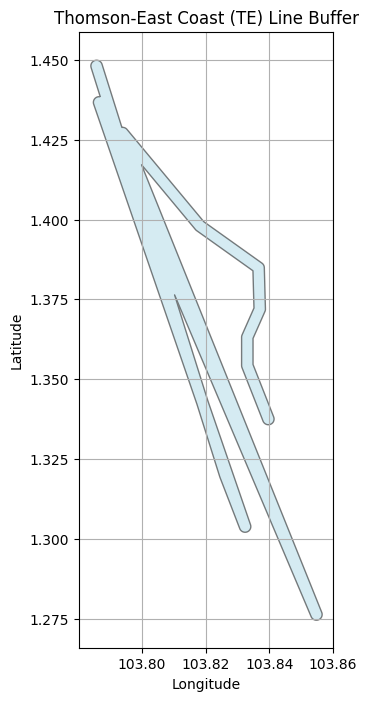

In [23]:
# Step 1: Filter the TE (Thomson-East Coast) line buffer
te_buffer_gdf = mrt_buffers[mrt_buffers['GROUPED_LINE'] == 'TE']

# Step 2: Plot the TE line buffer
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the TE buffer polygon
te_buffer_gdf.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)

# Add labels, title, and grid
ax.set_title("Thomson-East Coast (TE) Line Buffer")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.grid(True)

# Show the plot
plt.show()

In [27]:
import geopandas as gpd
import folium
from shapely.geometry import mapping

# Step 1: Filter only the TE buffer
te_buffer_gdf = mrt_buffers[mrt_buffers['GROUPED_LINE'] == 'TE']

# Step 2: Initialize a folium map centered on Singapore
map_sg = folium.Map(location=[1.3521, 103.8198], zoom_start=11, tiles=None)

# Step 3: Add OneMap tiles (Public OneMap basemap)
folium.TileLayer(
    tiles="https://maps-api.onemap.sg/v3/Default/{z}/{x}/{y}.png",
    attr="OneMap Singapore",
    name="OneMap",
).add_to(map_sg)

# Step 4: Add the TE line buffer polygons
for _, row in te_buffer_gdf.iterrows():
    geo_json = mapping(row['geometry'])
    folium.GeoJson(
        geo_json,
        style_function=lambda x: {
            'fillColor': 'lightblue',
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.5,
        }
    ).add_to(map_sg)

# Step 5: Add layer controls and save the map
folium.LayerControl().add_to(map_sg)
map_sg.save("te_line_buffer_map.html")

In [37]:

# Step 2: Check for intersections with the MRT buffers
gdf_bus_routes['intersects'] = gdf_bus_routes.geometry.apply(
    lambda bus_route: mrt_buffers.geometry.intersects(bus_route).any()
)

# Step 3: Filter routes that intersect with MRT buffers
intersecting_routes = gdf_bus_routes[gdf_bus_routes['intersects']]

# Display the results
print(intersecting_routes[['ServiceNo', 'geometry']])

      ServiceNo                   geometry
0            10  POINT (103.94339 1.35408)
1            10  POINT (103.94165 1.35296)
2            10  POINT (103.94209 1.34875)
4            10  POINT (103.95067 1.33737)
5            10  POINT (103.95015 1.33395)
...         ...                        ...
25473        9B  POINT (103.95771 1.34563)
25474        9B  POINT (103.95776 1.34719)
25475        9B   POINT (103.9548 1.35303)
25476        9B   POINT (103.9553 1.35508)
25480        9B  POINT (103.96538 1.36474)

[12368 rows x 2 columns]


In [38]:
# Step 2: Calculate intersections with MRT buffers and their lengths
mrt_union = mrt_buffers.geometry.union_all()

gdf_bus_routes['intersection_length'] = gdf_bus_routes.geometry.apply(
    lambda bus_route: bus_route.intersection(mrt_union).length
)

# Step 3: Filter routes that intersect with MRT buffers
intersecting_routes = gdf_bus_routes[gdf_bus_routes['intersection_length'] > 0]

# Step 4: Calculate the overlap percentage
intersecting_routes['overlap_percentage'] = (
    intersecting_routes['intersection_length'] / intersecting_routes['TotalLength']
) * 100

# Display the intersecting routes and their overlap percentages
print(intersecting_routes[['ServiceNo', 'Direction', 'TotalLength', 'intersection_length', 'overlap_percentage']])


Empty DataFrame
Columns: [ServiceNo, Direction, TotalLength, intersection_length, overlap_percentage]
Index: []
